c:\Users\hp\Desktop\matos\tenx 10academy\week 3\End-to-End Insurance Risk Analytics & Predictive Modeling\src\utils\eda.py:17: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(filepath, sep='|')  # Specify pipe delimiter for .txt files


Data loaded successfully with 1000098 rows and 52 columns.

--- Dataset Summary ---
        UnderwrittenCoverID      PolicyID     TransactionMonth  \
count          1.000098e+06  1.000098e+06              1000098   
unique                  NaN           NaN                   23   
top                     NaN           NaN  2015-08-01 00:00:00   
freq                    NaN           NaN               106747   
mean           1.048175e+05  7.956682e+03                  NaN   
std            6.329371e+04  5.290039e+03                  NaN   
min            1.000000e+00  1.400000e+01                  NaN   
25%            5.514300e+04  4.500000e+03                  NaN   
50%            9.408300e+04  7.071000e+03                  NaN   
75%            1.391900e+05  1.107700e+04                  NaN   
max            3.011750e+05  2.324600e+04                  NaN   

       IsVATRegistered Citizenship   LegalType    Title Language  \
count          1000098     1000098     1000098  1000098

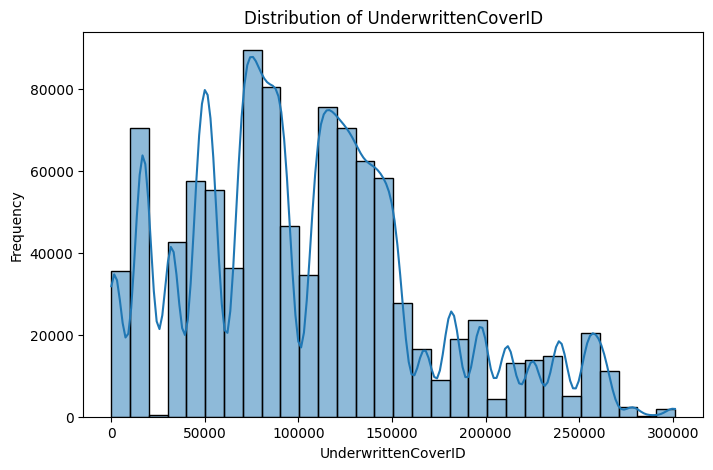

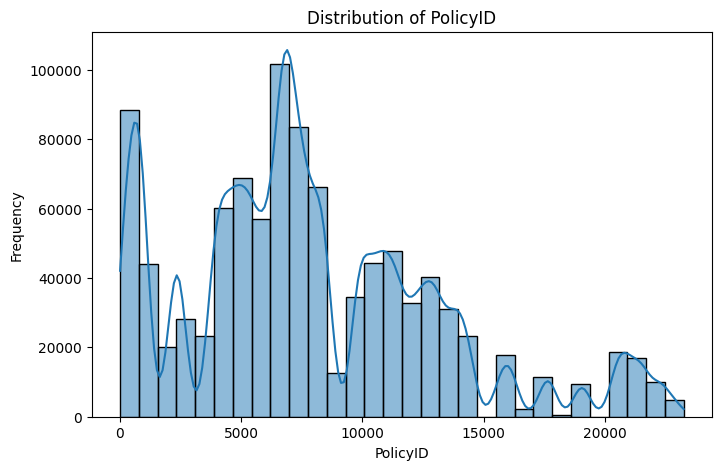

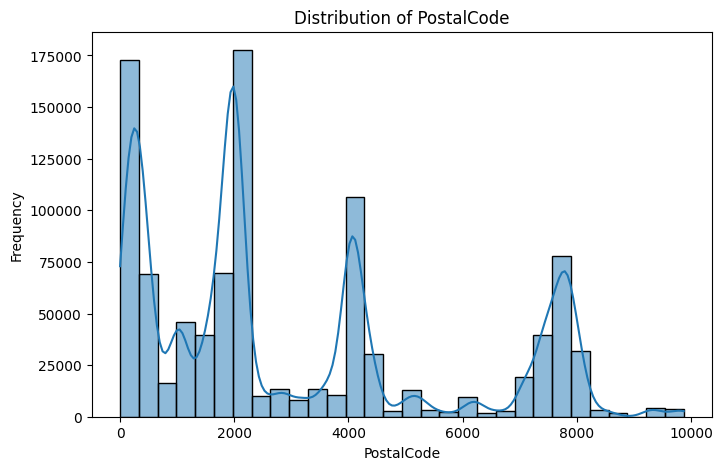

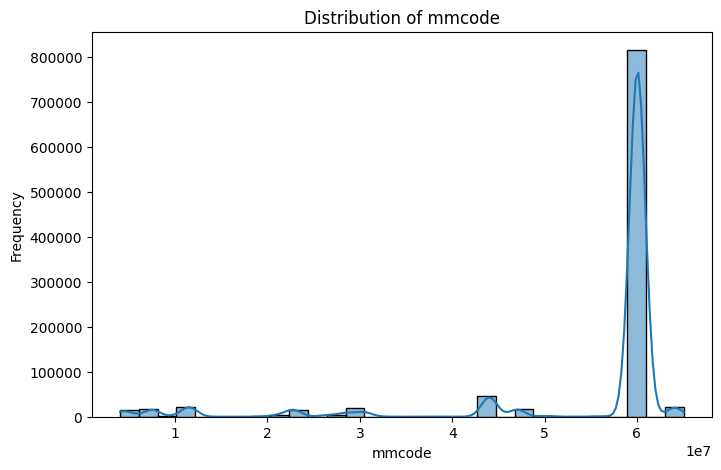

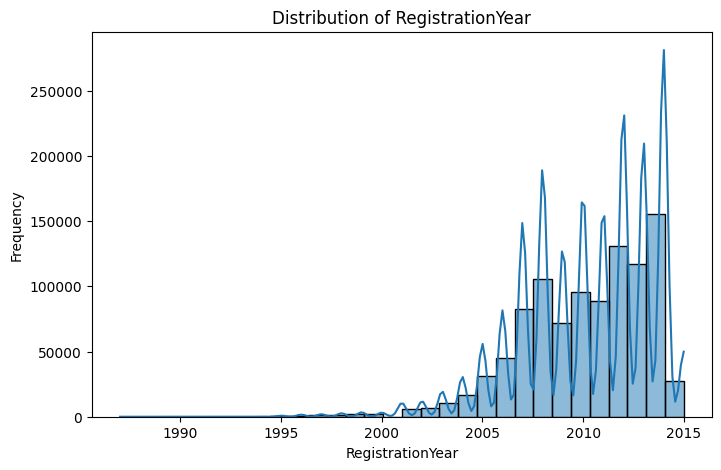

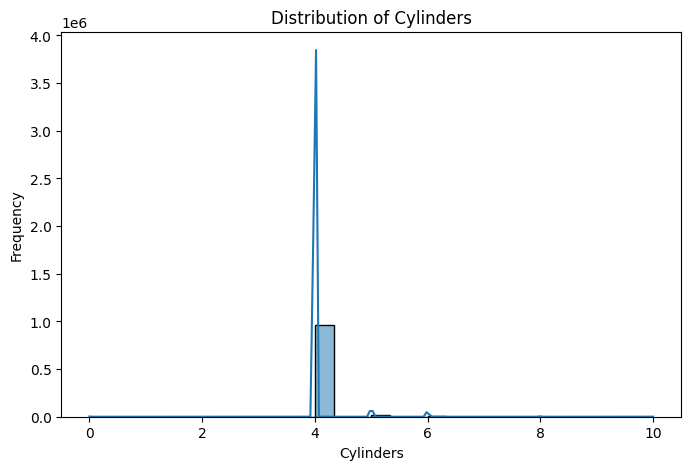

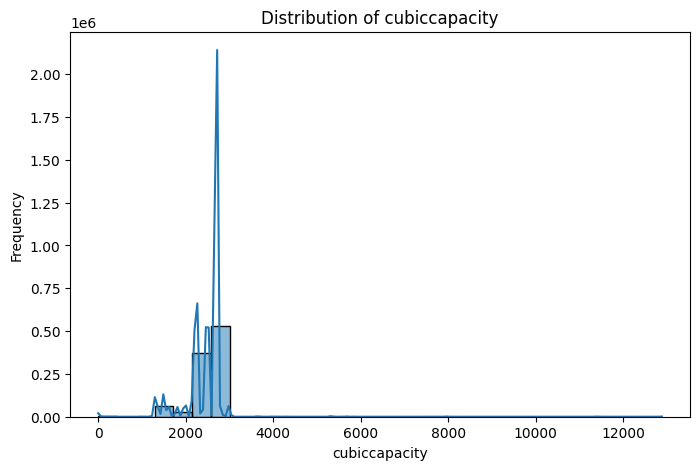

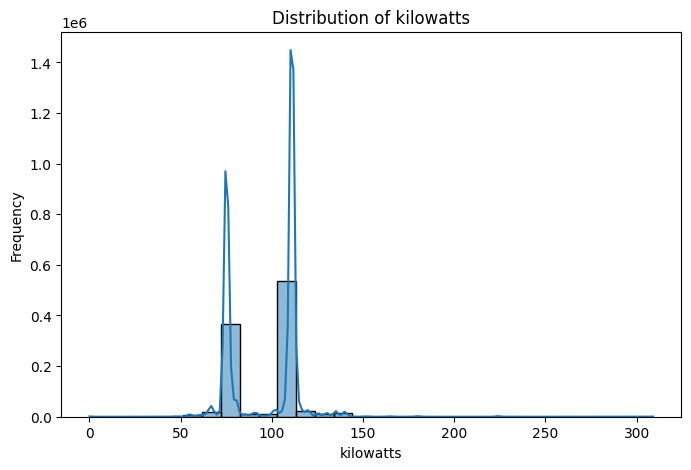

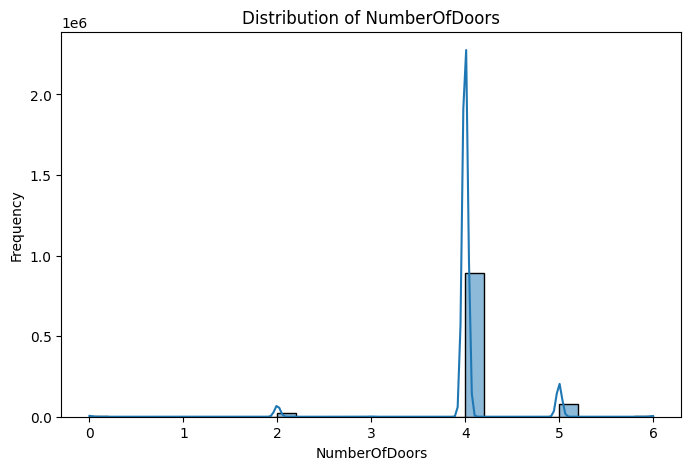

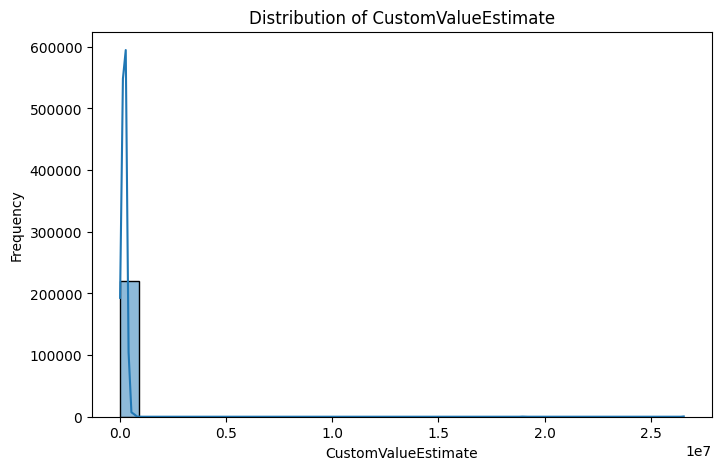

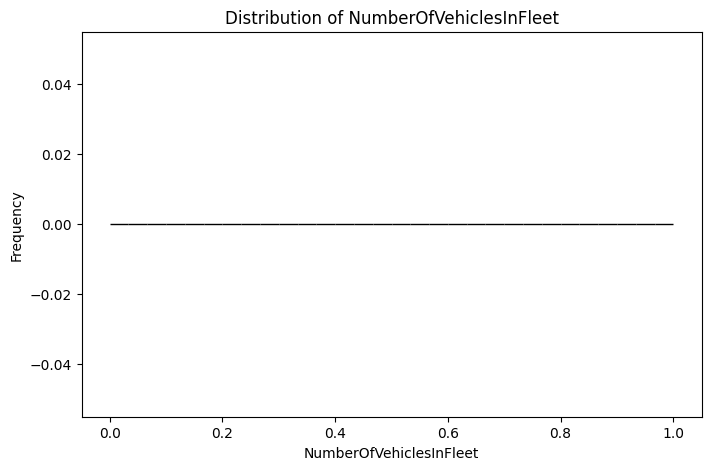

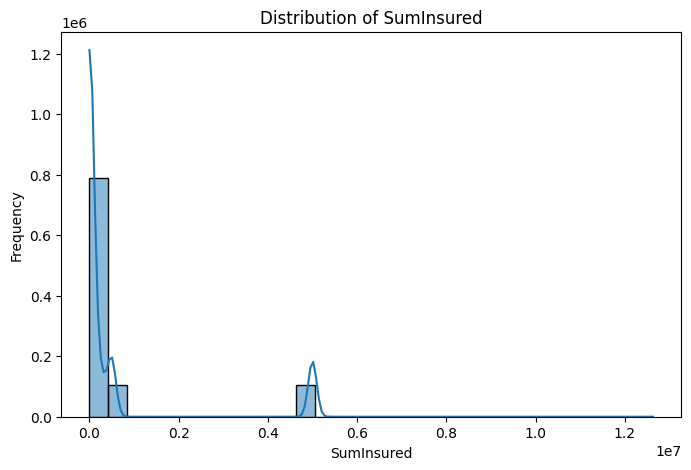

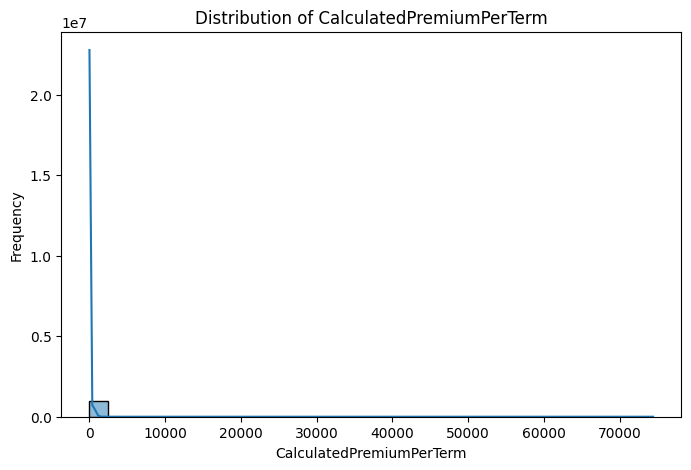

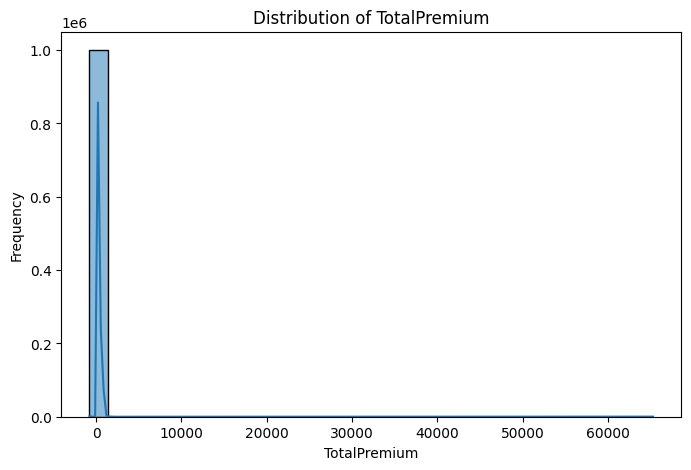

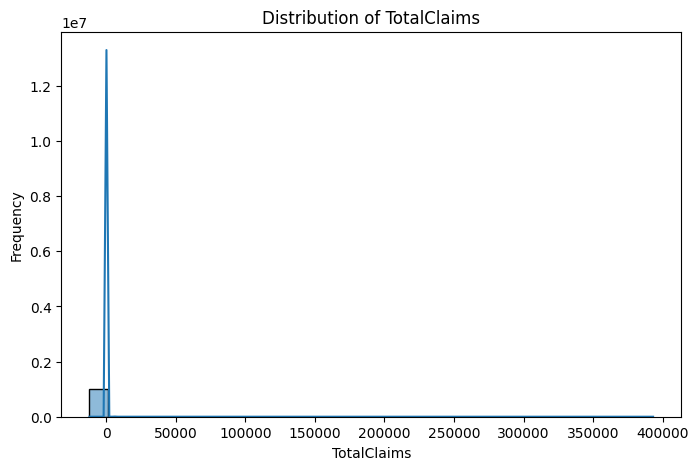


Detecting outliers in numerical features:


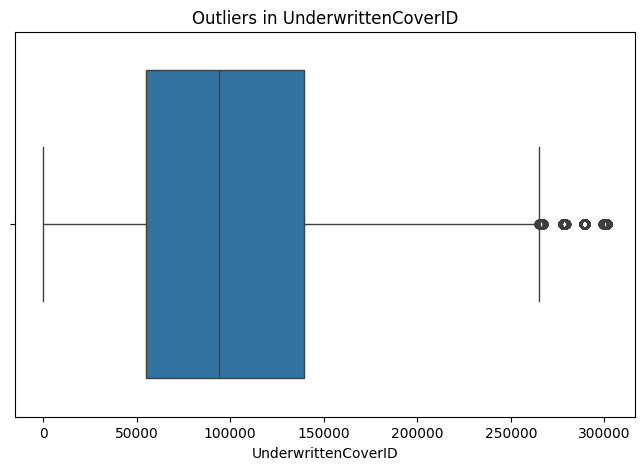

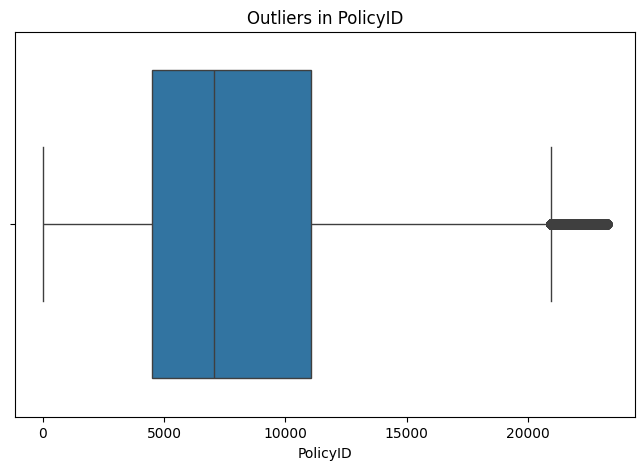

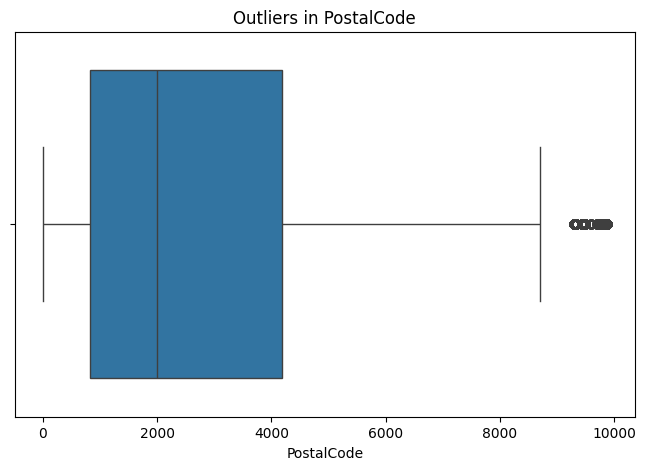

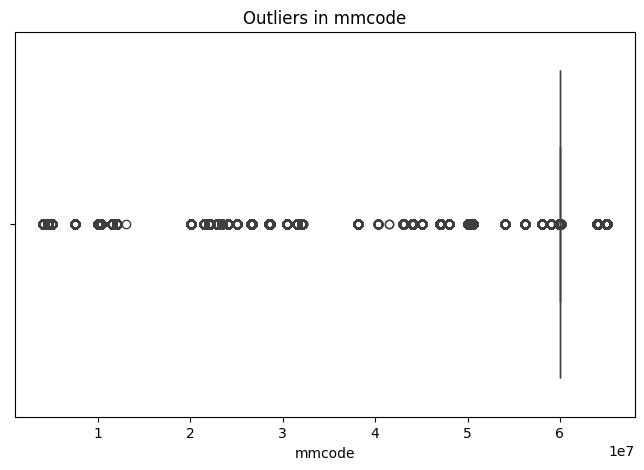

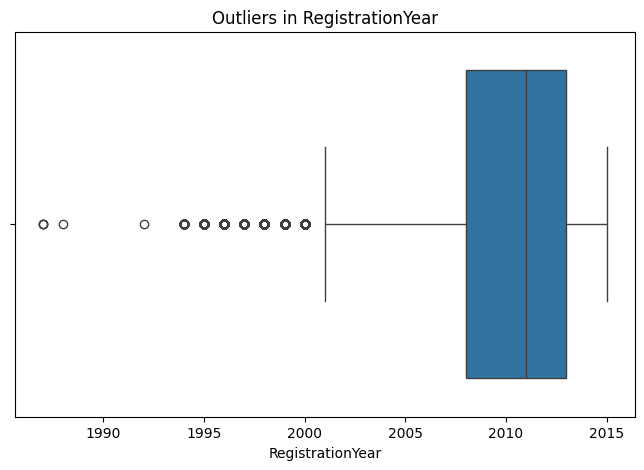

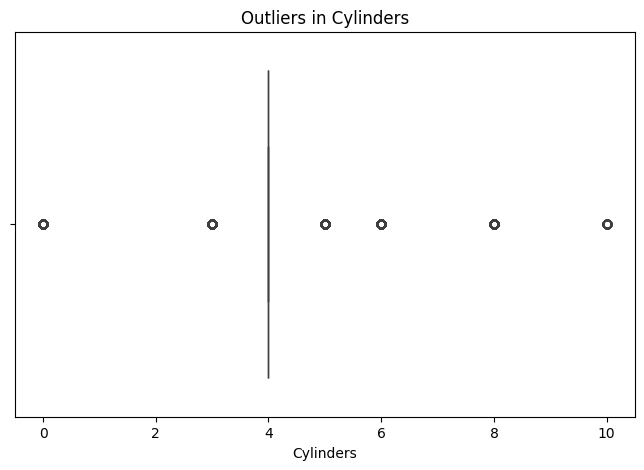

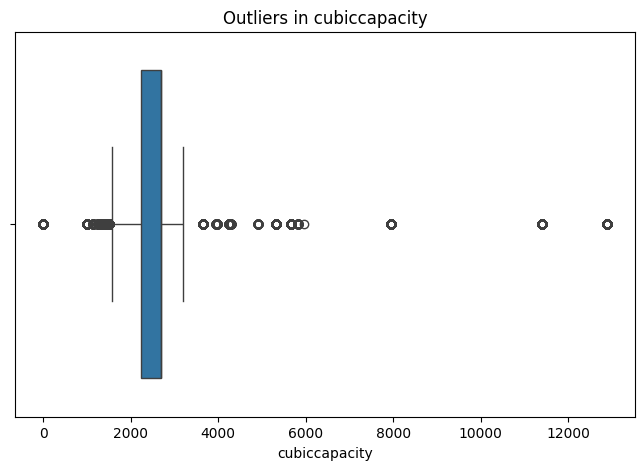

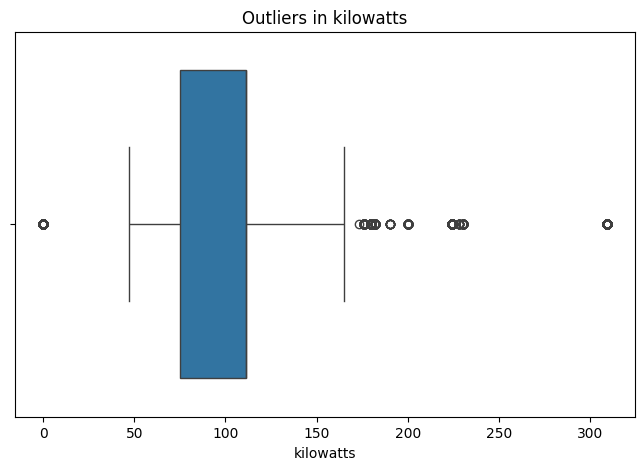

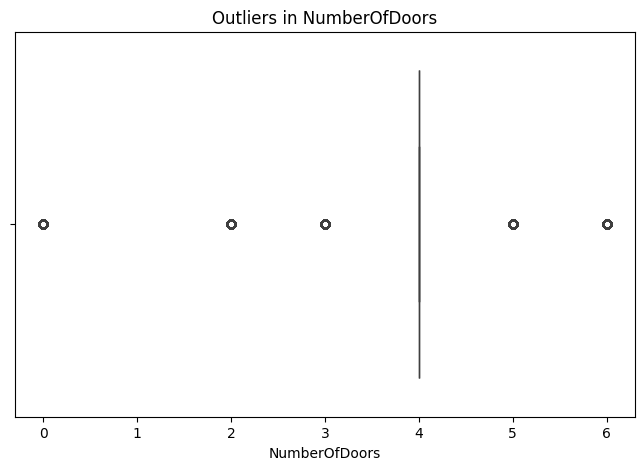

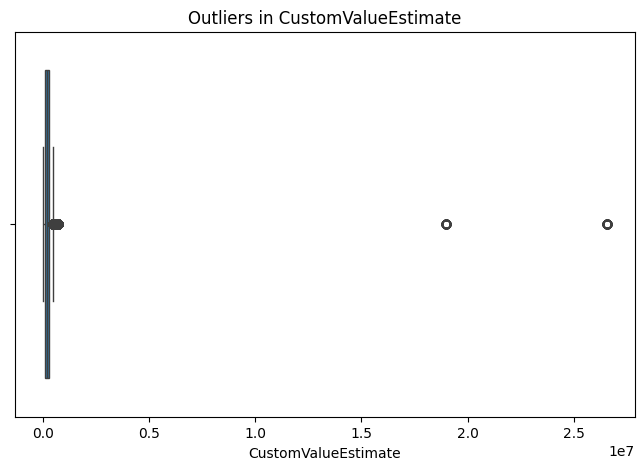

Skipping NumberOfVehiclesInFleet: not enough valid data for boxplot.


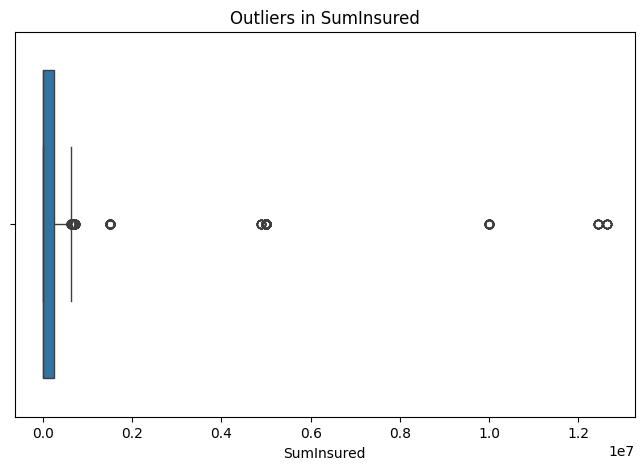

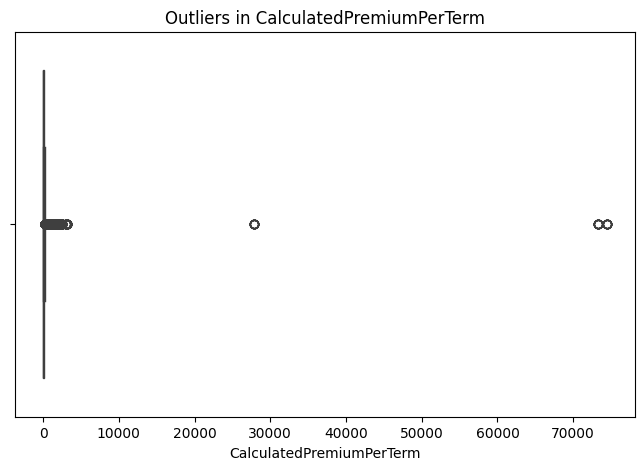

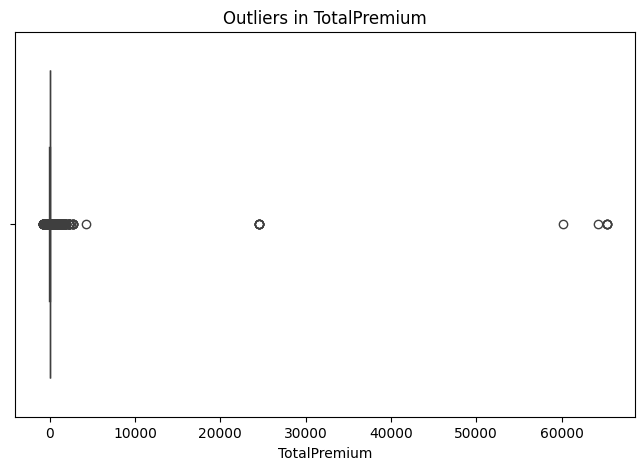

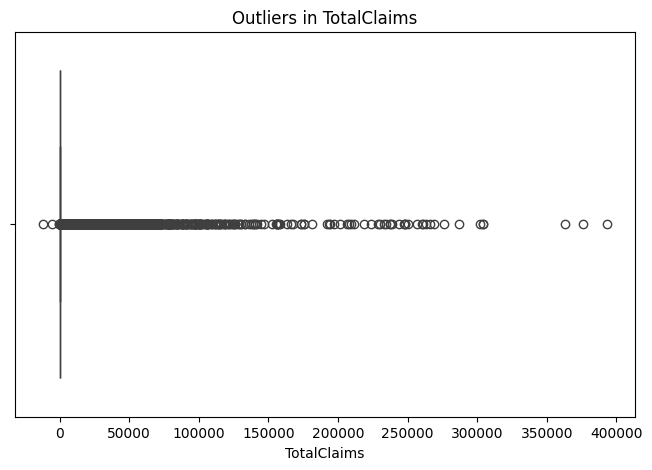


Visualizing categorical feature distributions:


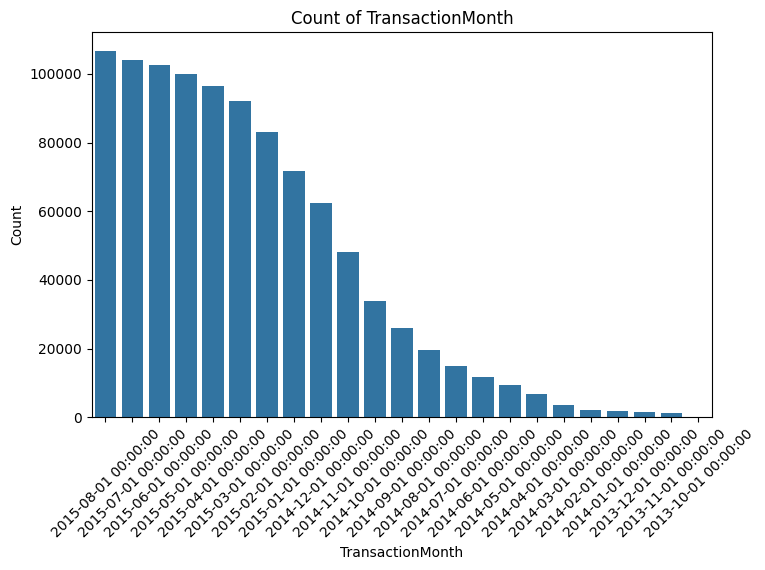

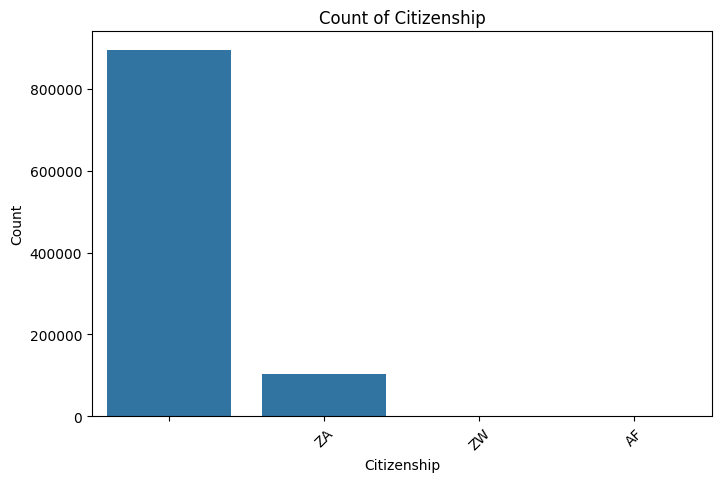

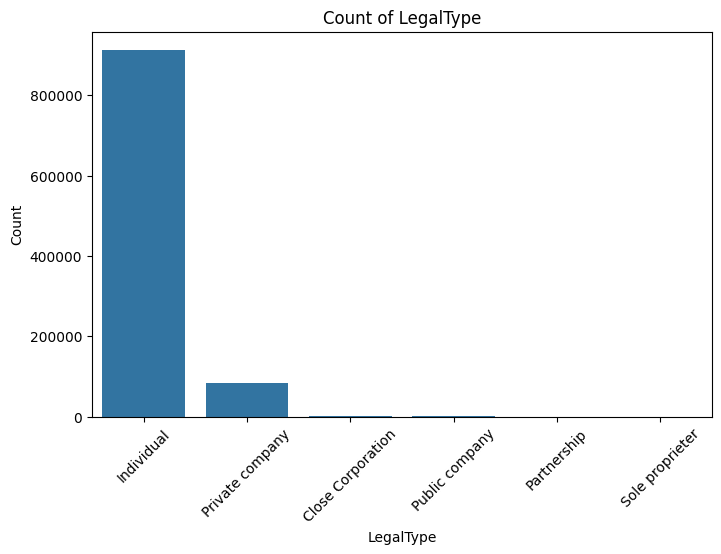

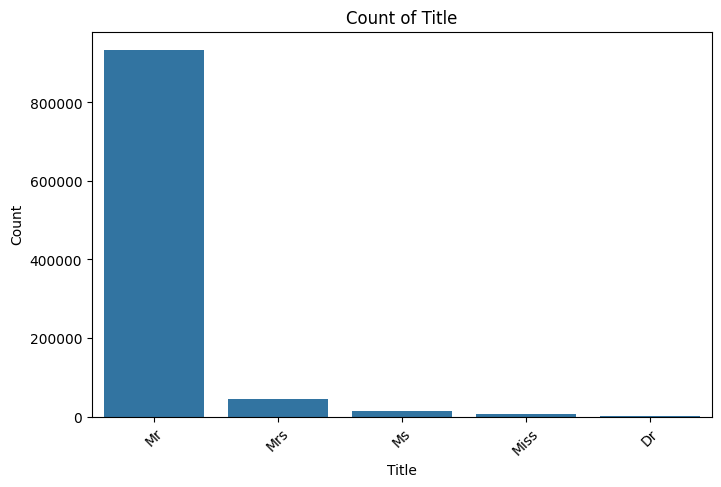

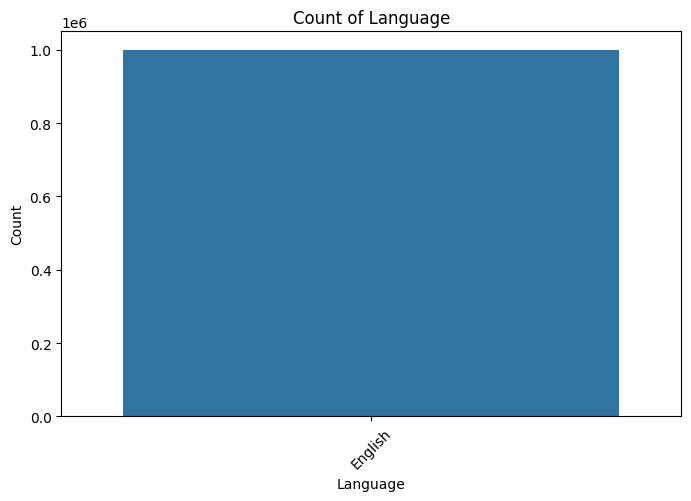

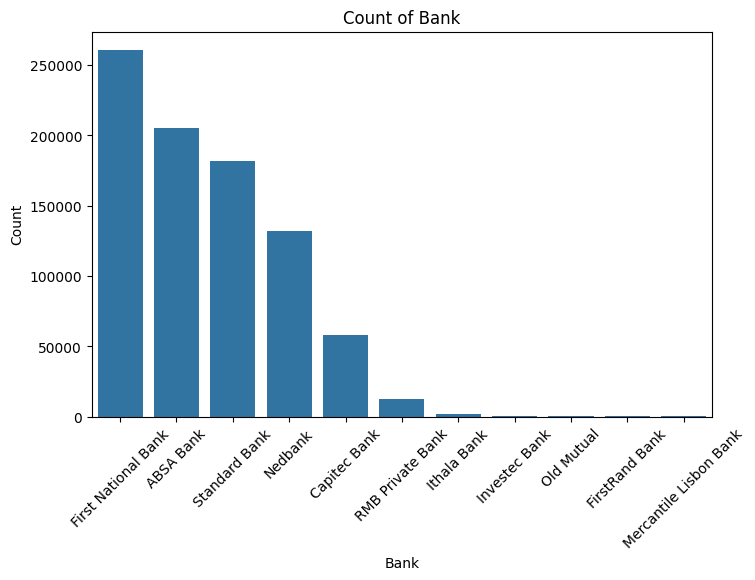

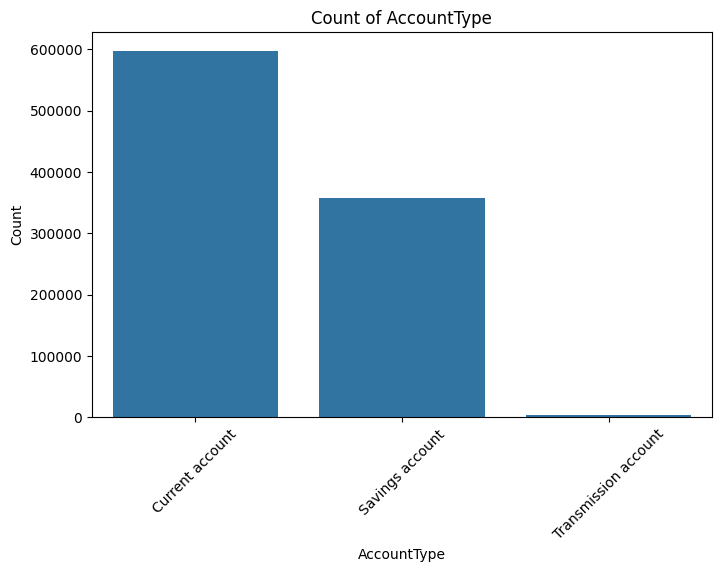

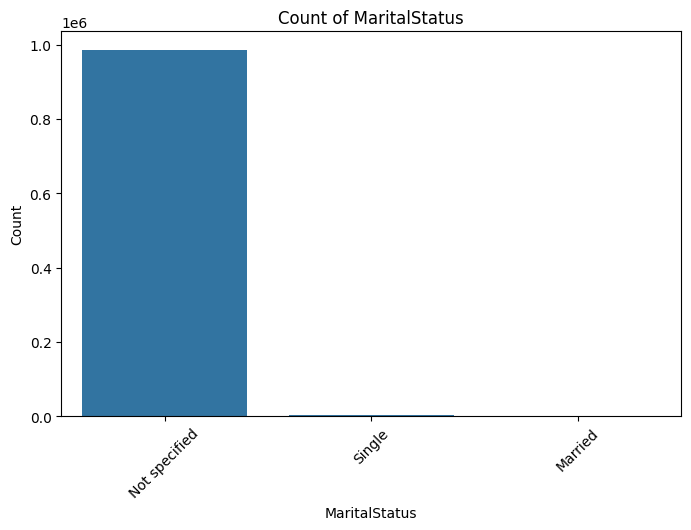

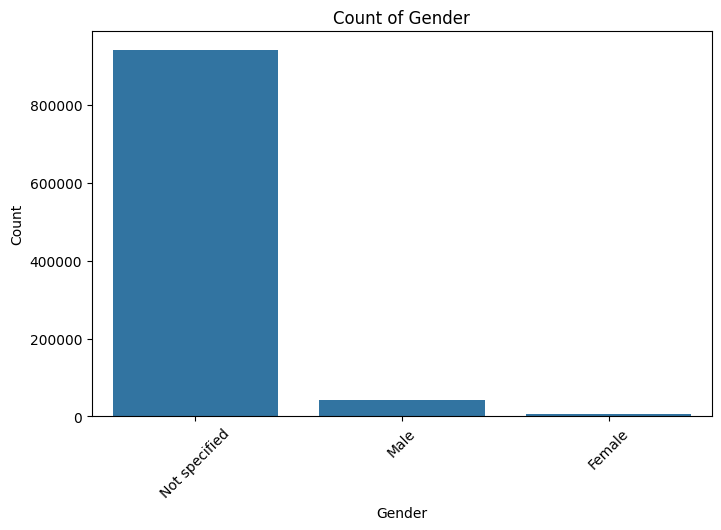

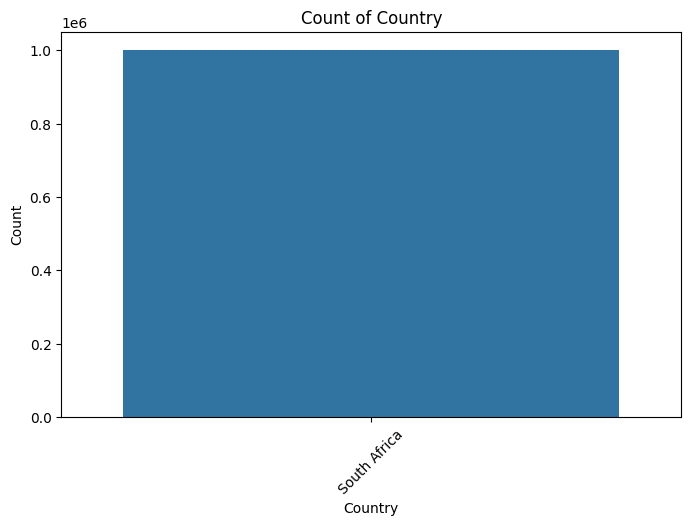

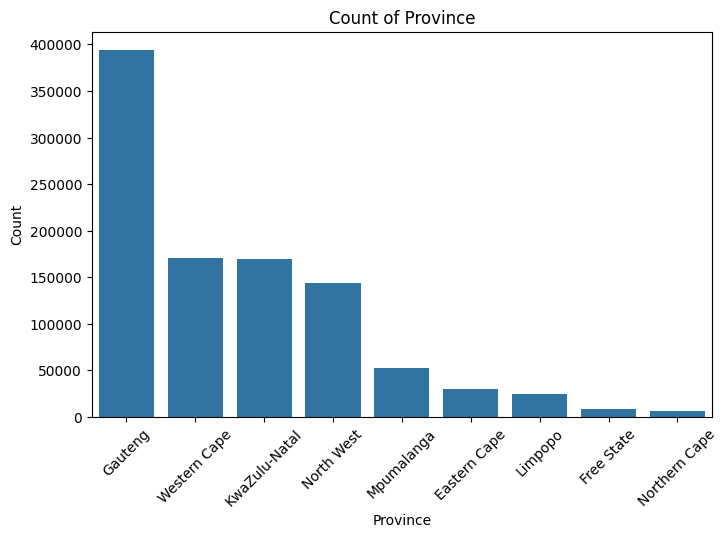

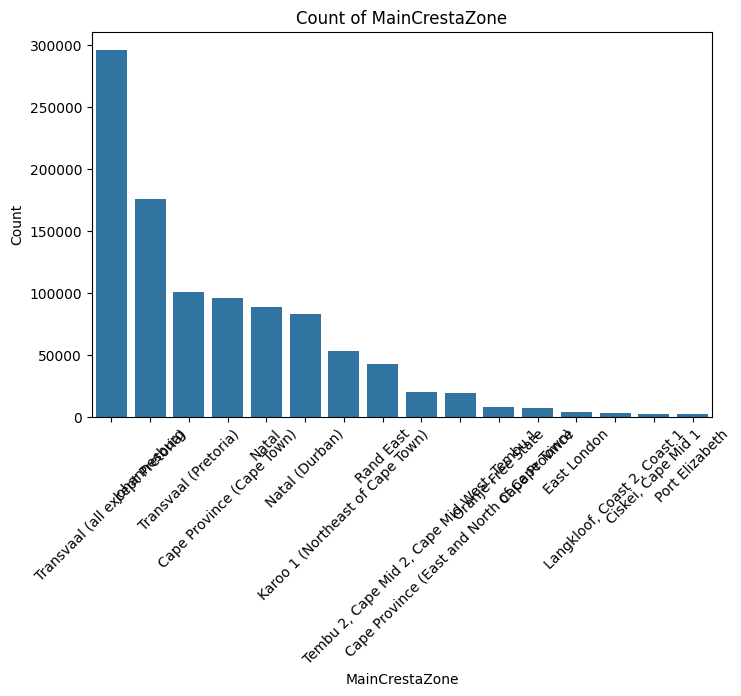

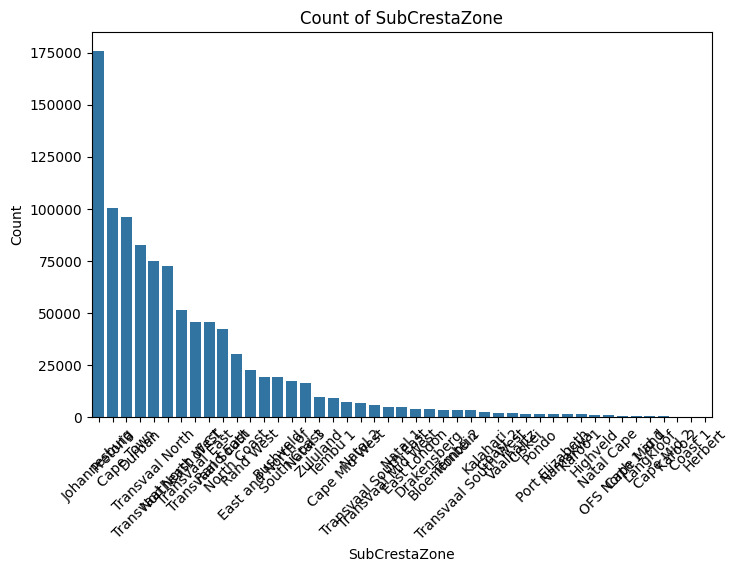

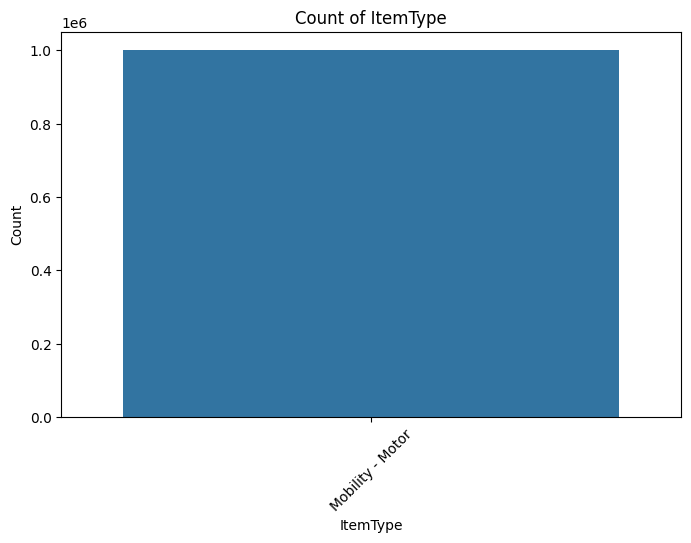

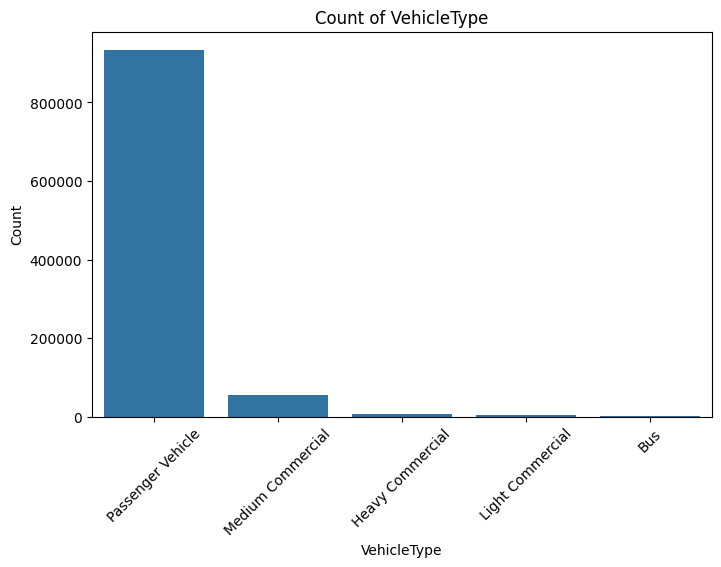

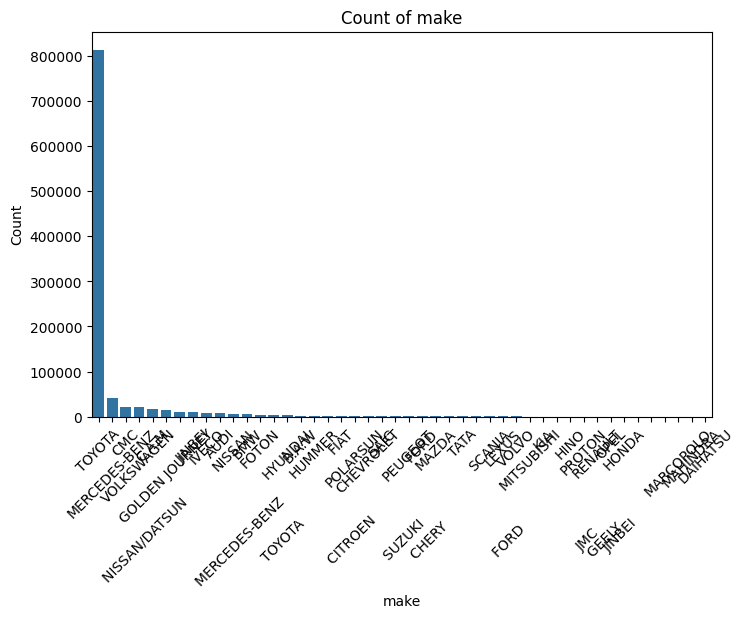

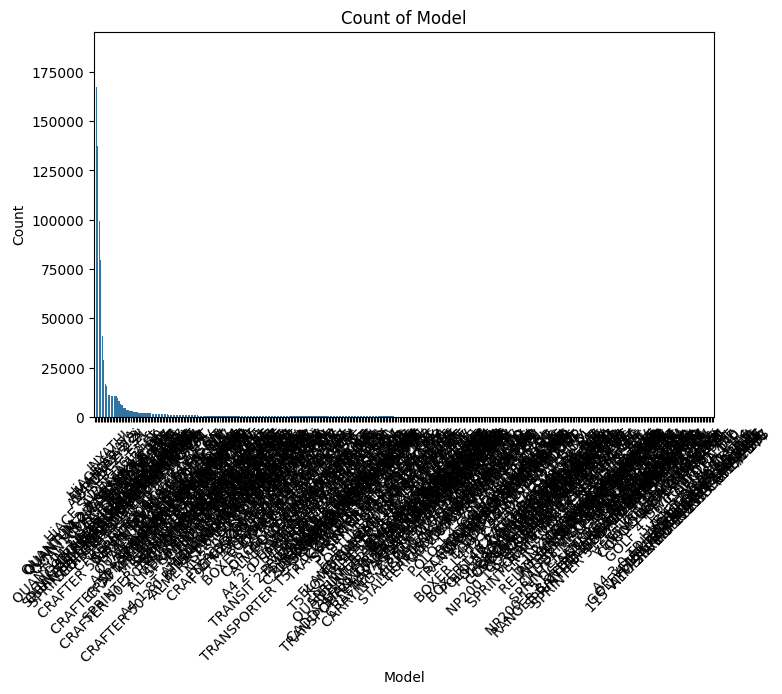

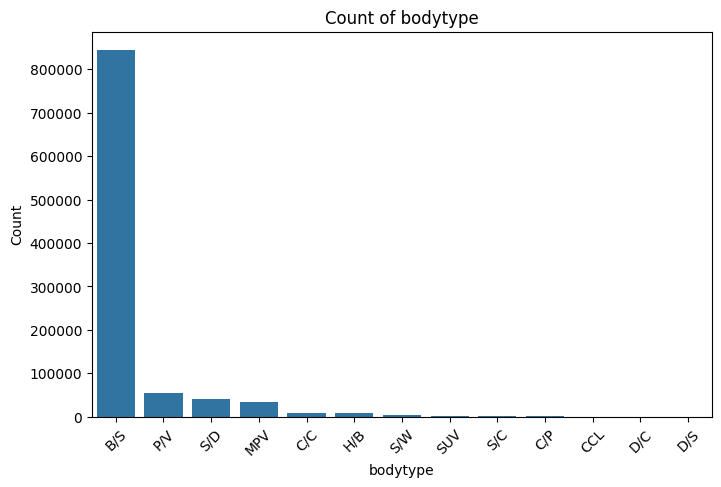

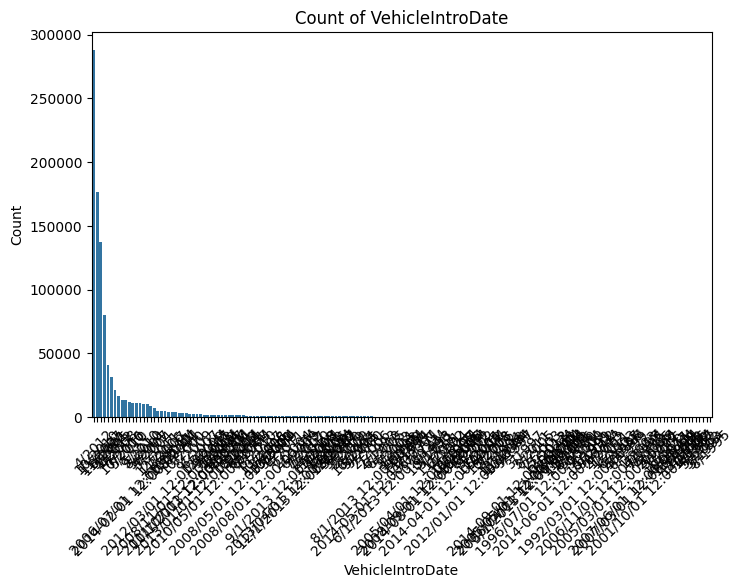

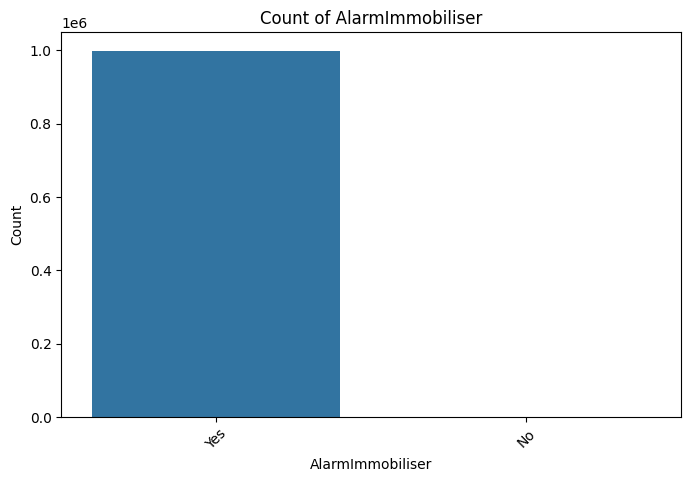

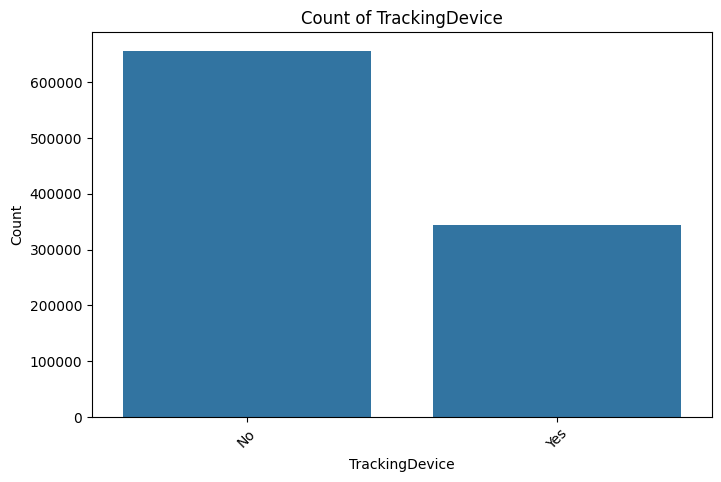

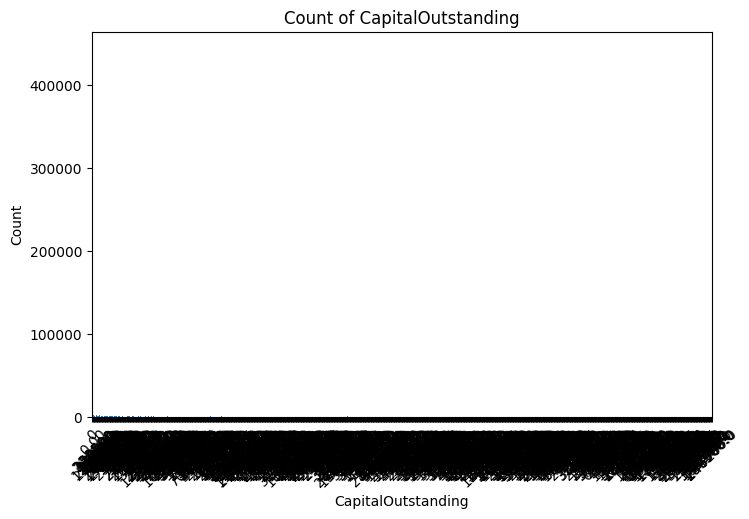

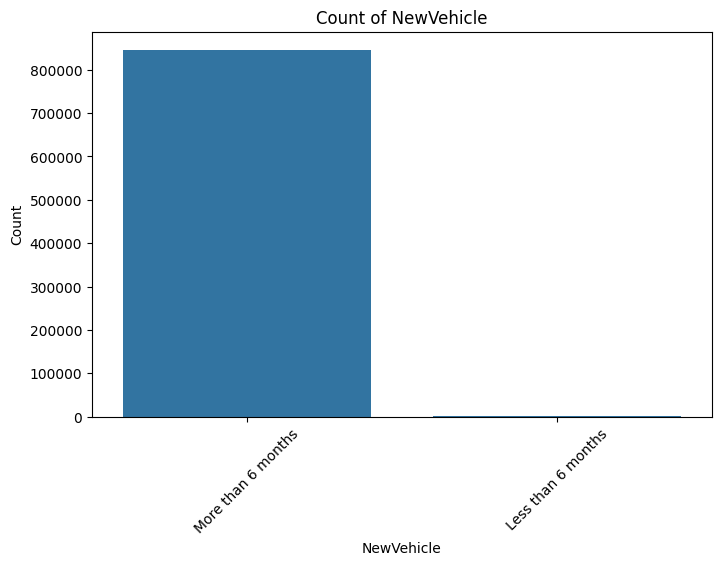

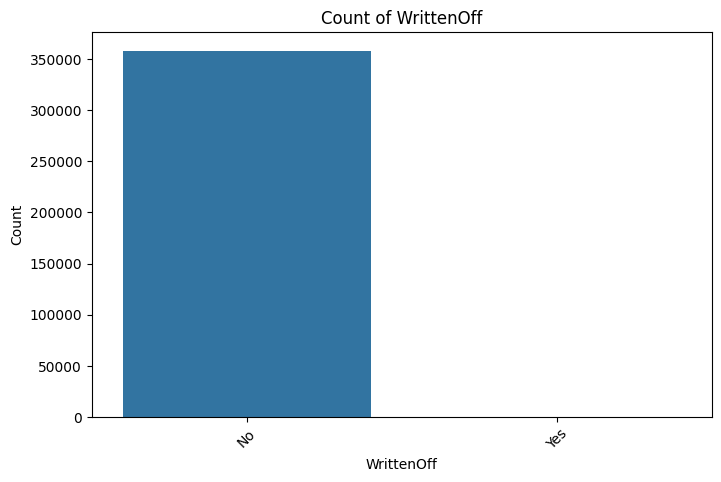

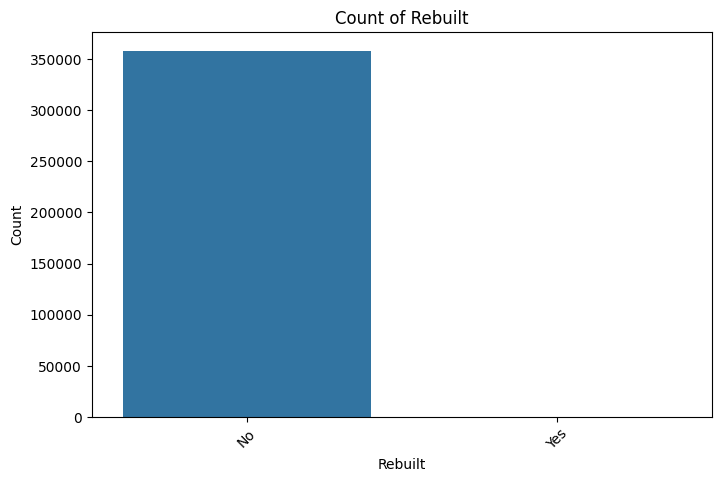

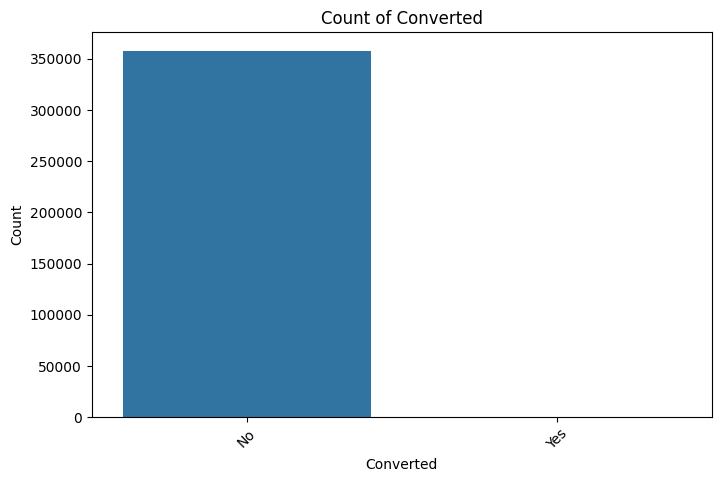

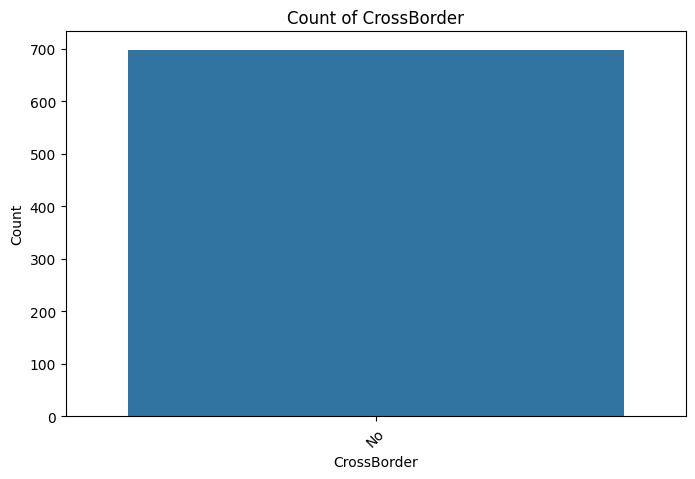

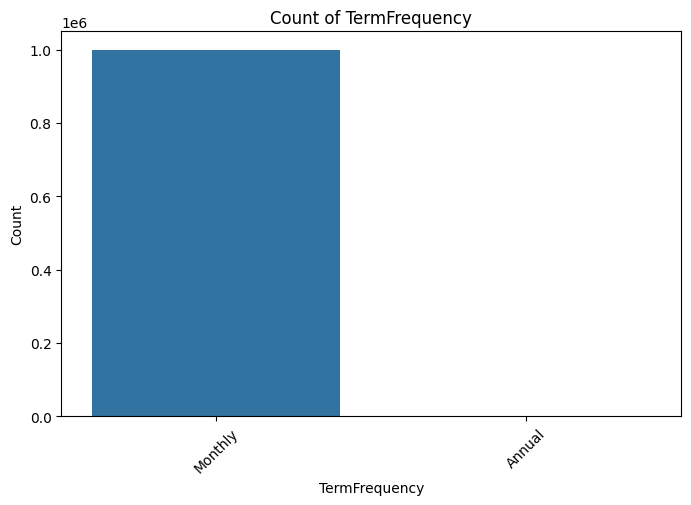

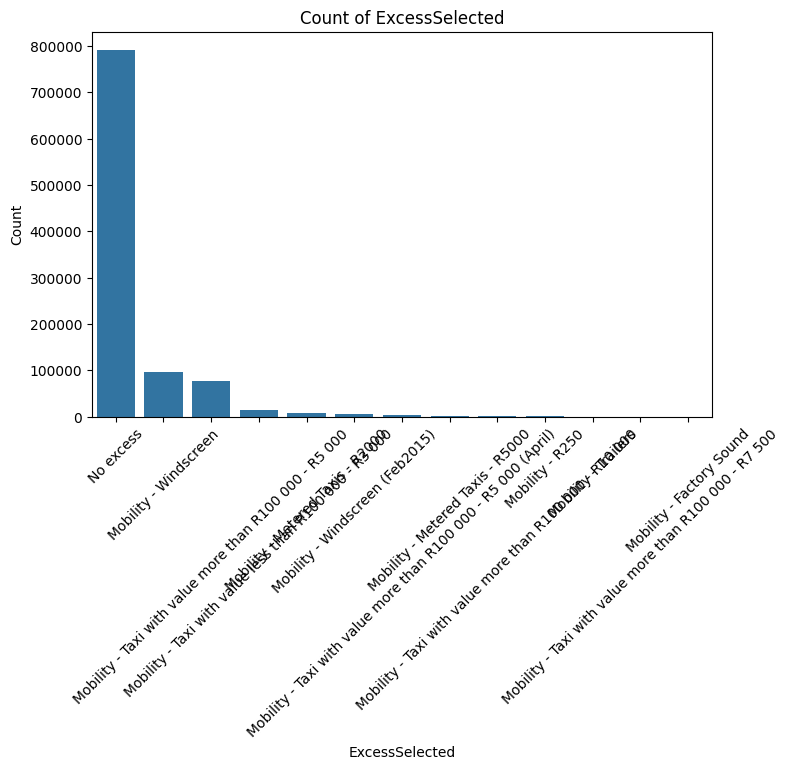

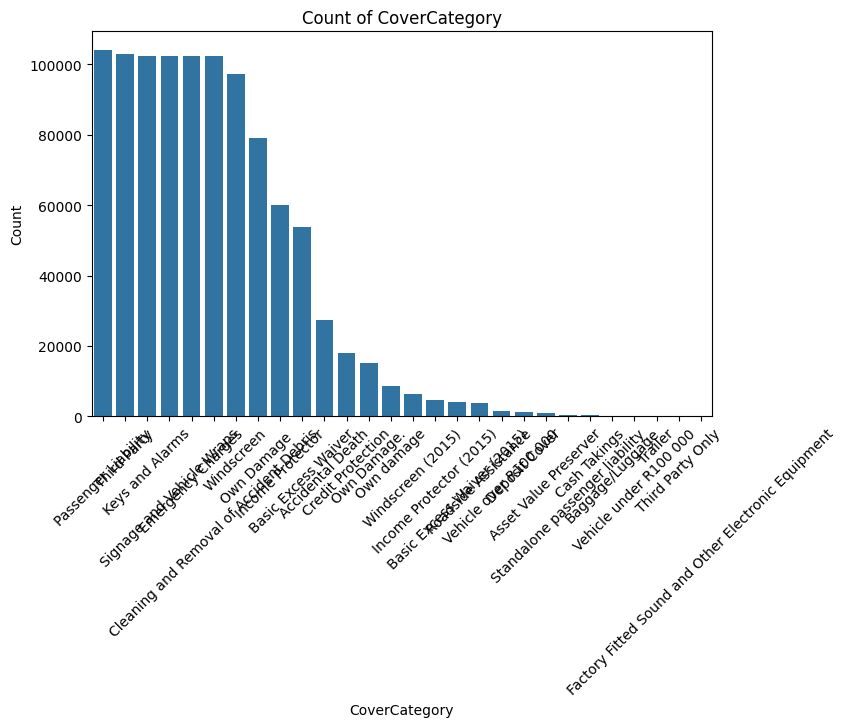

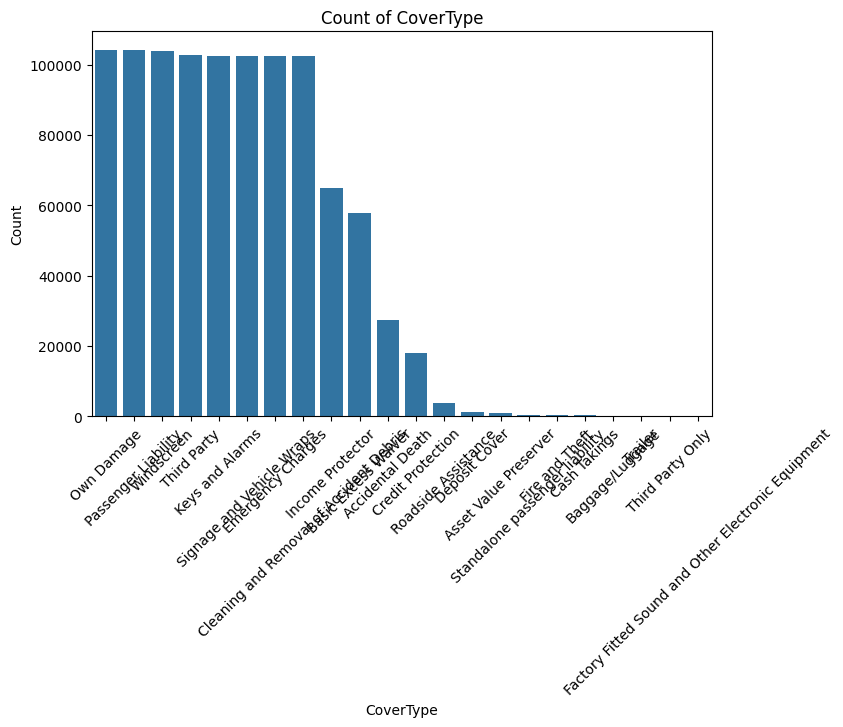

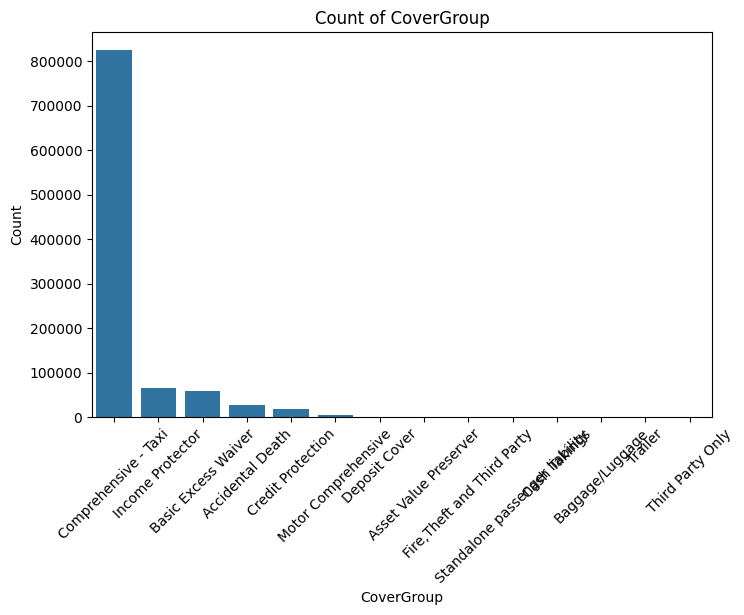

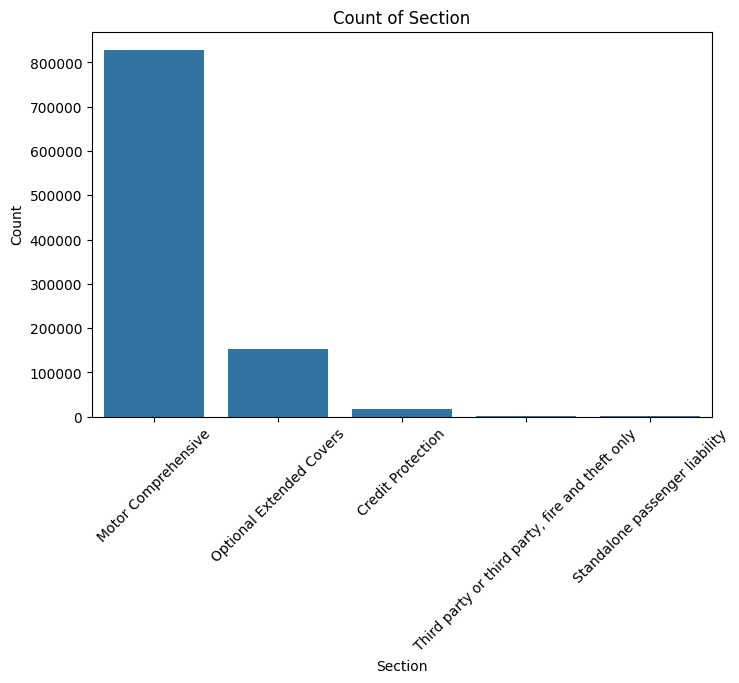

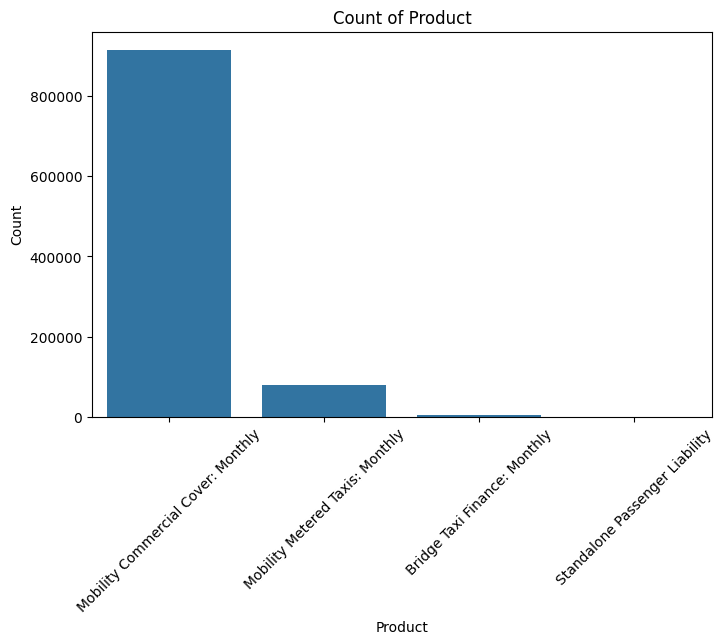

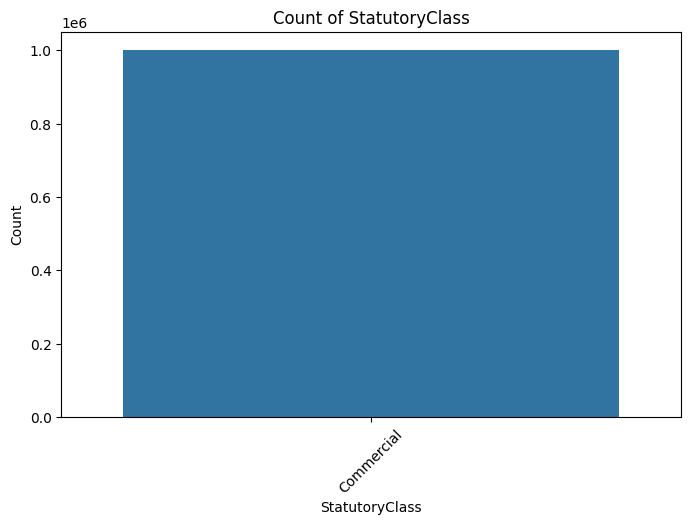

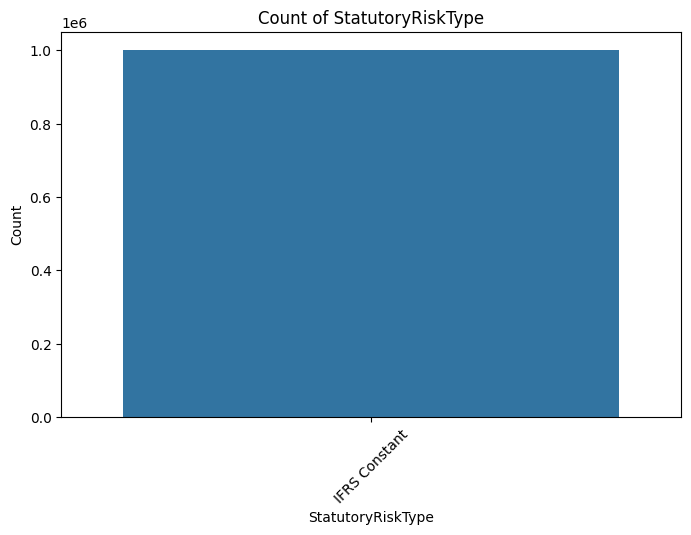


Analyzing correlations among numerical features:


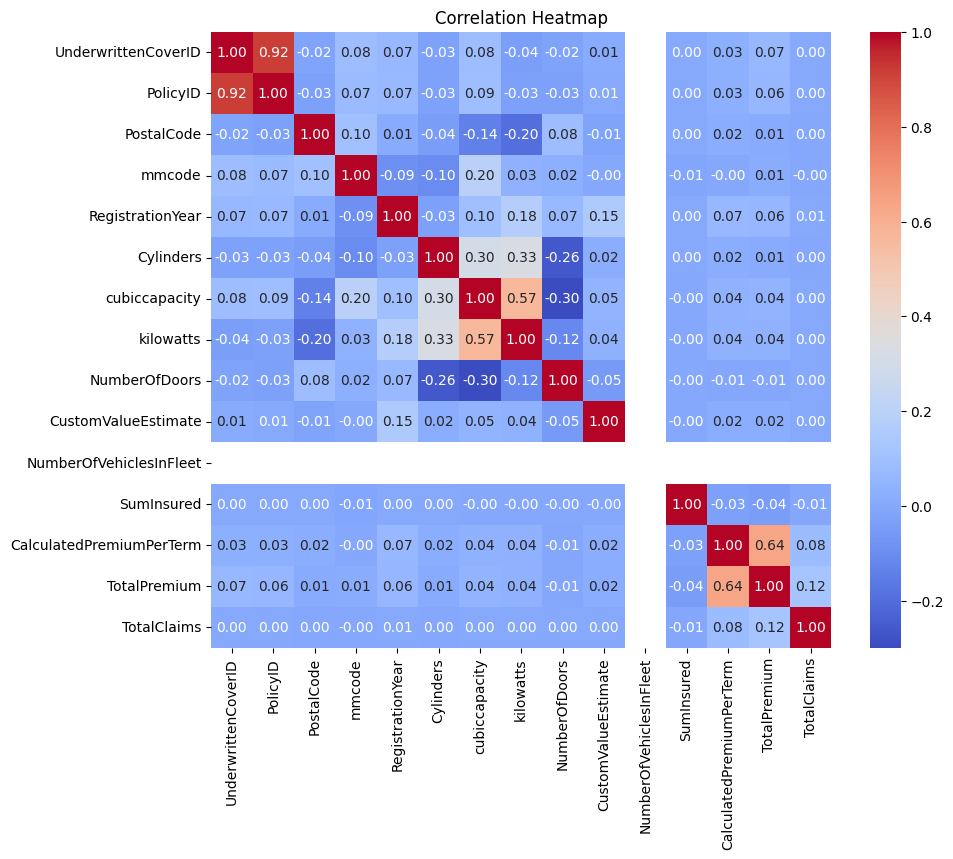


Calculating Loss Ratio:
Overall Loss Ratio: nan


c:\Users\hp\Desktop\matos\tenx 10academy\week 3\End-to-End Insurance Risk Analytics & Predictive Modeling\venv\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)



Grouped Loss Ratio:
 Province       VehicleType        Gender       
Eastern Cape   Heavy Commercial   Not specified    0.000000
               Light Commercial   Not specified    0.000000
               Medium Commercial  Not specified    1.684985
               Passenger Vehicle  Not specified         inf
Free State     Heavy Commercial   Not specified    0.000000
               Light Commercial   Not specified    0.000000
               Medium Commercial  Not specified    0.335526
               Passenger Vehicle  Not specified         inf
Gauteng        Bus                Not specified         NaN
               Heavy Commercial   Not specified         inf
               Light Commercial   Not specified    1.569932
               Medium Commercial  Male             1.173400
                                  Not specified         inf
               Passenger Vehicle  Female           0.778557
                                  Male                  inf
                              

In [4]:
# Exploratory Data Analysis (EDA) for AlphaCare Insurance Solutions (ACIS)

# ## 1. Introduction

# ### Objective
# In this notebook, we aim to:
# 1. Load and inspect the dataset.
# 2. Summarize and visualize the key features of the data.
# 3. Identify trends, patterns, and potential issues (e.g., missing values or outliers).
# 4. Lay the groundwork for deeper analysis by answering guiding questions.

# ### Structure
# This notebook follows a modular approach by utilizing reusable functions from `eda.py`. Each section is clearly defined and provides detailed comments for reproducibility.

# ## 2. Setup

# ### Import Libraries and Modules
# Importing necessary libraries and modules for data analysis and visualization.
import sys
import os
sys.path.append(os.path.abspath('../src/utils'))
import eda  # Custom module with EDA functions
import pandas as pd


# Define the file path to the dataset
DATA_PATH = "../data/raw/MachineLearningRating_v3.txt"

# ## 3. Data Understanding

# ### Load the Dataset
# Use the `load_data` function from `eda.py` to load the dataset.
# This step provides feedback on whether the file was loaded successfully and the dimensions of the dataset.
data = eda.load_data(DATA_PATH)

# ### Summarize the Dataset
# Once loaded, summarize the dataset using `summarize_data` to understand its structure.
# This function highlights missing values, column data types, and basic statistics.
if data is not None:
    eda.summarize_data(data)
else:
    print("Error: Dataset could not be loaded. Please check the file path.")


# ## 4. Exploratory Data Analysis (EDA)

# ### 4.1 Numerical Feature Analysis
# Identify numerical columns for statistical and visual analysis.
if data is not None:
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Plot distributions of numerical features
    print("\nVisualizing numerical feature distributions:")
    eda.plot_distributions(data, numerical_columns)

    # Detect outliers using box plots
    print("\nDetecting outliers in numerical features:")
    eda.detect_outliers(data, numerical_columns)

# ### 4.2 Categorical Feature Analysis
# Identify categorical columns for frequency analysis.
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

    # Plot distributions of categorical features
    print("\nVisualizing categorical feature distributions:")
    eda.plot_categorical_counts(data, categorical_columns)

# ### 4.3 Correlation Analysis
# Analyze correlations among numerical features to understand relationships.
    print("\nAnalyzing correlations among numerical features:")
    eda.analyze_correlations(data, numerical_columns)

# ### 4.4 Calculating Loss Ratio
# Calculate the Loss Ratio (TotalClaims / TotalPremium) for the portfolio and by groups (Province, VehicleType, Gender).
    print("\nCalculating Loss Ratio:")
    data['LossRatio'] = data['TotalClaims'] / data['TotalPremium']
    print("Overall Loss Ratio:", data['LossRatio'].mean())

    grouped_loss_ratio = data.groupby(['Province', 'VehicleType', 'Gender'])['LossRatio'].mean()
    print("\nGrouped Loss Ratio:\n", grouped_loss_ratio)

# ### 4.5 Temporal Trends Analysis
# Explore temporal trends in claims and premiums over the 18-month period.
    print("\nAnalyzing Temporal Trends:")
    if 'Date' in data.columns:
        data['Date'] = pd.to_datetime(data['Date'])
        temporal_trends = data.groupby(data['Date'].dt.to_period('M')).agg({'TotalClaims': 'sum', 'TotalPremium': 'sum'})
        temporal_trends.plot(kind='line', title='Temporal Trends of Claims and Premiums', figsize=(10, 6))

# ### 4.6 Vehicle Make/Model Analysis
# Identify vehicle makes/models associated with the highest and lowest claims.
    print("\nAnalyzing Vehicle Makes/Models:")
    vehicle_claims = data.groupby(['make', 'Model'])['TotalClaims'].sum().sort_values()
    print("\nTop 5 Vehicle Makes/Models with Lowest Claims:\n", vehicle_claims.head())
    print("\nTop 5 Vehicle Makes/Models with Highest Claims:\n", vehicle_claims.tail())

# ## 5. Guiding Questions

# ### Q1: What is the overall Loss Ratio (TotalClaims / TotalPremium) for the portfolio?
# **Answer**: The overall Loss Ratio is calculated above.

# ### Q2: How does the Loss Ratio vary by Province, VehicleType, and Gender?
# **Answer**: Grouped Loss Ratios are displayed above for these categories.

# ### Q3: What are the distributions of key financial variables? Are there outliers in TotalClaims or CustomValueEstimate that could skew our analysis?
# **Answer**: Distributions and outliers are visualized above.

# ### Q4: Are there temporal trends? Did the claim frequency or severity change over the 18-month period?
# **Answer**: Temporal trends are visualized above using line plots.

# ### Q5: Which vehicle makes/models are associated with the highest and lowest claim amounts?
# **Answer**: These are identified and printed above.

# ## 6. Next Steps

# Based on the insights gained from this EDA:
# - Address missing values or outliers as needed.
# - Proceed to thematic clustering and sentiment analysis in subsequent tasks.
